# **Importing data into Pandas DataFrame**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from predict import inference_items
from pymongo import MongoClient
from datetime import datetime

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
client = MongoClient("mongodb://localhost:27017/")
db = client['data_mining']
collection = db['reddit_data']

# Đọc dữ liệu từ MongoDB vào DataFrame
df = pd.DataFrame(list(collection.find()))
df.head()

# Đọc dữ liệu từ CSV vào DataFrame
# df = pd.read_csv('./datasets/final_data.csv')

# **Splitting the full training set into training set and validation set**

In [7]:
from sklearn.model_selection import train_test_split

**Splitting the data into training set and test set, and data and labels. Our task is to predict 2 target: The number of voteups and the number of comment for a Reddit post.**

In [8]:
X_train_full = df.iloc[:, 3:]
Y_train_full = df.iloc[:, 1 : 3]

#Splittng the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X_train_full, Y_train_full, 
                                                    test_size = 0.2, random_state = 42)

In [9]:
X_train #data used in training models

,subscribers,isFriday,isMonday,isSaturday,isSunday,isThursday,isTuesday,isWednesday,isAfternoon,isEvening,...,without,woman,women,work,working,world,would,wrong,year,years
10378,4112285,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23352,518260,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3473,200445,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26901,16288789,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
34862,239325,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,2055470,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6265,31975130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,3027432,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1267355,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train #training target

,num_comments,ups
10378,113,486
23352,43,176
3473,240,2364
26901,37,225
34862,9,242
...,...,...
16850,171,619
6265,49,925
11284,401,365
860,48,410


# **Preprocessing data in Scikit-Learn Pipeline**

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
#Define the numerical pipeline, with the imputer filling missing value with mean value of the column.
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "mean")),
                        ("std_scaler", StandardScaler())])

#Full transform pipeline
full_pipeline = Pipeline([("full_transform", num_pipeline)])

# **Training separate models to predict 2 features**

**We will experiment with models to predict 2 features. One is the number of uploads for each post. The other is the number of comments for each post, given all the input informations**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_validate

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

**First we would build experimental models to predict the number of voteups for the Reddit post. We would experiment with 4 models: RandomForest, ExtraTree, GradientBoosting and LinearSVR**

In [15]:
random_forest = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', RandomForestRegressor(random_state = 42))
])

extra_tree = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', ExtraTreesRegressor(random_state = 42))
])

In [16]:
grad_boost = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', GradientBoostingRegressor(random_state = 42))
])

In [17]:
linear_svr = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', LinearSVR(random_state = 42))
])

**Fit the random forest model.**

In [18]:
random_forest.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', RandomForestRegressor(random_state=42))])

**Fit the extratree model**

In [19]:
extra_tree.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', ExtraTreesRegressor(random_state=42))])

**Fit the Gradient Boosting Model**

In [20]:
grad_boost.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', GradientBoostingRegressor(random_state=42))])

**Fit the LinearSVR model.**

In [21]:
linear_svr.fit(X_train, y_train.iloc[:, 1])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', LinearSVR(random_state=42))])

**Secondly we would build experimental models to predict the number of comments for the Reddit post. We would experiment with 4 models: RandomForest, ExtraTree, GradientBoosting and LinearSVR**

In [22]:
random_forest_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', RandomForestRegressor(random_state = 42))
])

extra_tree_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', ExtraTreesRegressor(random_state = 42))
])

grad_boost_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', GradientBoostingRegressor(random_state = 42))
])

linear_svr_2 = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', LinearSVR(random_state = 42))
])

**Fit the random forest model, to predict the numbers of comments in the posts.**

In [23]:
random_forest_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', RandomForestRegressor(random_state=42))])

**Fit the extra tree model, to predict the numbers of comments in the posts.**

In [24]:
extra_tree_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', ExtraTreesRegressor(random_state=42))])

**Fit the Gradient Boosting model, to predict the numbers of comments in the posts.**

In [25]:
grad_boost_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', GradientBoostingRegressor(random_state=42))])

**Fit the LinearSVR model, to predict the numbers of comments in the posts.**

In [26]:
linear_svr_2.fit(X_train, y_train.iloc[:, 0])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('full_transform',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]))])),
                ('classifier', LinearSVR(random_state=42))])

# **Calculate metrics for the trained models**

**Two functions to calculate metrics after training the Sklearn models. One would calculate metrics on the training set, the other would perform cross validation to better judge model accuracy.**

**The metrics calculated would be Mean Absolute Percentage Error(MAPE) Root Mean Squared Error(RMSE) and Mean Absolute Error(MAE).**

In [27]:
#Function to calculate the regression metrics on the training dataset
def calculating_metrics_on_training_set(estimator, X, y):
    train_prediction = estimator.predict(X)
    print("The mean absolute error on the training set is ", 
          mean_absolute_error(y, train_prediction))
    print("The root mean squared error on the training set is ", 
          mean_squared_error(y, train_prediction, squared = False))
    print("The mean absolute percentage error on the training set is ", 
          mean_absolute_percentage_error(y, train_prediction))

#Function to calculate the cross validation regression metrics for the Sklearn estimators.
def cross_validation(estimator, X, y, cv):
    
    cross_val_score = cross_validate(estimator, X, y, cv = cv, 
                        scoring = ['neg_mean_absolute_percentage_error', 
                                   'neg_root_mean_squared_error', 'neg_mean_absolute_error'],
                        n_jobs = -1)
    print("The mean cross validation score for MAPE is:", 
          -np.mean(cross_val_score["test_neg_mean_absolute_percentage_error"]))
    print("The mean cross validation score for MAE is:", 
          -np.mean(cross_val_score["test_neg_mean_absolute_error"]))
    print("The mean cross validation score for RMSE is:", 
          -np.mean(cross_val_score["test_neg_root_mean_squared_error"]))

**Calculating metrics by this 2 functions, on the 4 different experimental models for the Scikit-learn models that predicted the number of voteups**

In [28]:
calculating_metrics_on_training_set(random_forest, X_train, y_train.iloc[:, 1])
cross_validation(random_forest, X_train, y_train.iloc[:, 1], cv = 5)

The mean absolute error on the training set is  23.7167433735938
The root mean squared error on the training set is  210.23687986111278
The mean absolute percentage error on the training set is  0.054815330278038615
The mean cross validation score for MAPE is: 0.16280969394395942
The mean cross validation score for MAE is: 73.19751011879032
The mean cross validation score for RMSE is: 484.18613621001316


In [29]:
calculating_metrics_on_training_set(extra_tree, X_train, y_train.iloc[:, 1])
cross_validation(extra_tree, X_train, y_train.iloc[:, 1], cv = 5)

The mean absolute error on the training set is  4.092740064302835
The root mean squared error on the training set is  117.45645014847855
The mean absolute percentage error on the training set is  0.011019519741180034
The mean cross validation score for MAPE is: 0.10668927741536212
The mean cross validation score for MAE is: 41.810152641960876
The mean cross validation score for RMSE is: 476.05572123406193


**Calculating metrics by this 2 functions, on the 2 different experimental models for the Scikit-learn models that predicted the number of comments**

In [30]:
y_train.iloc[:, 0].mean()

218.216544666335

In [31]:
calculating_metrics_on_training_set(random_forest_2, X_train, y_train.iloc[:, 0])
cross_validation(random_forest_2, X_train, y_train.iloc[:, 0], cv = 5)

The mean absolute error on the training set is  4.656533826907402
The root mean squared error on the training set is  46.62746419265107
The mean absolute percentage error on the training set is  307260012954.08594
The mean cross validation score for MAPE is: 9689799689305.797
The mean cross validation score for MAE is: 14.933946728830838
The mean cross validation score for RMSE is: 101.67178349922453


In [32]:
calculating_metrics_on_training_set(extra_tree_2, X_train, y_train.iloc[:, 0])
cross_validation(extra_tree_2, X_train, y_train.iloc[:, 0], cv = 5)

The mean absolute error on the training set is  0.5358456310980296
The root mean squared error on the training set is  9.187175566447397
The mean absolute percentage error on the training set is  0.009378771480355864
The mean cross validation score for MAPE is: 160014198876.3764
The mean cross validation score for MAE is: 7.758496957717009
The mean cross validation score for RMSE is: 75.1554583193301


# **Plotting Bar Chart, Visualization**

**Visualization, to compare the accuracy of different models.**

In [33]:
from utility import comparing_models_cross_validation_bar_plot, comparing_models_test_bar_plot
from utility import save_fig

**The cross validation bar chart to compare metrics(MAE and RMSE) computed during cross validation process, for the voteups model.**

Figure saved to images/comparison_voteups_cross_validation.png


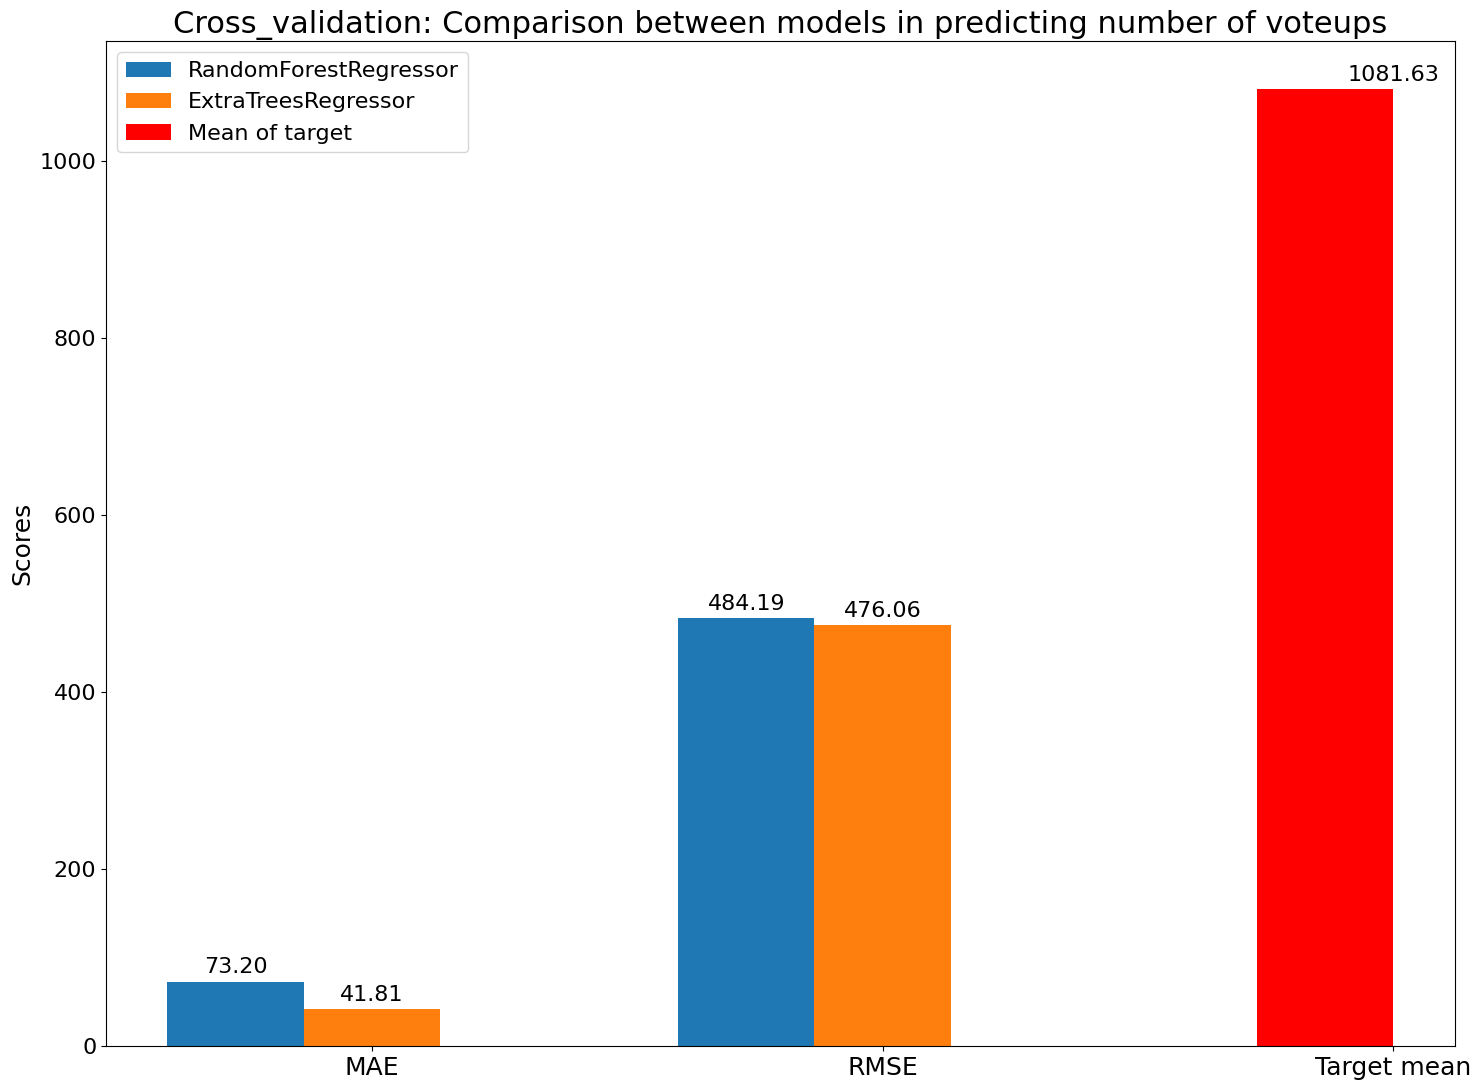

In [34]:
comparing_models_cross_validation_bar_plot([random_forest, extra_tree], X_train, y_train.iloc[:, 1],
    plot_title = "Cross_validation: Comparison between models in predicting number of voteups", cv = 5, save_path= "images/comparison_voteups_cross_validation.png")

**The cross validation bar chart to compare metrics(MAE and RMSE) computed during cross validation process, for the comments model.**

Figure saved to images/comparison_comments_cross_validation.png


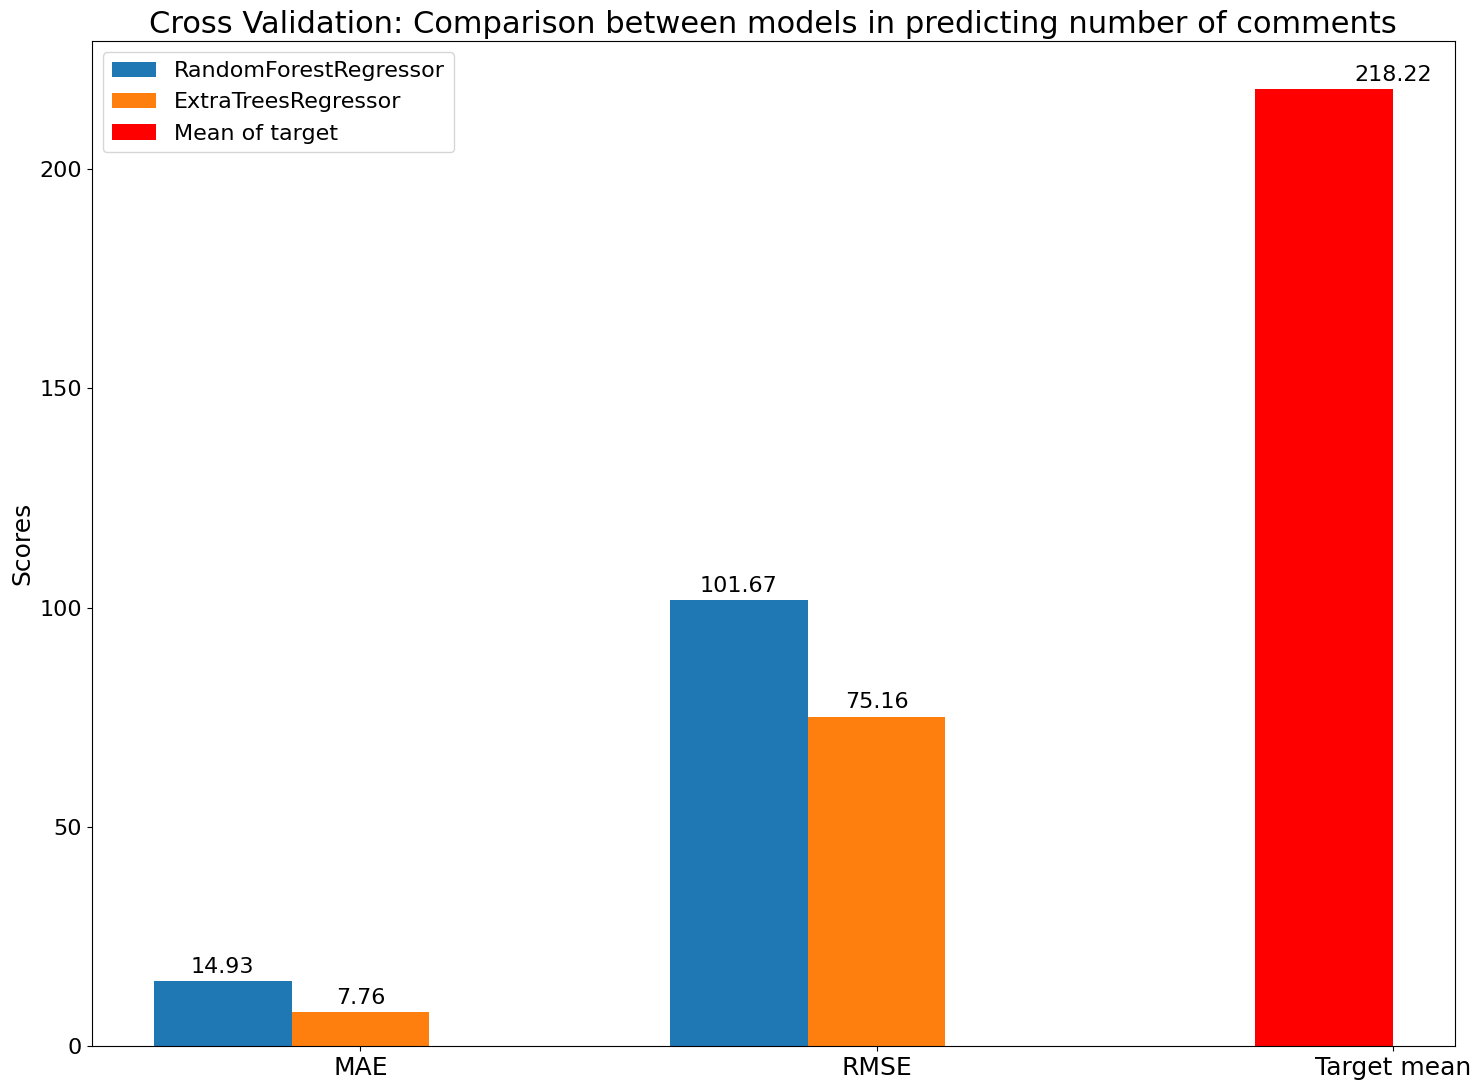

In [35]:
comparing_models_cross_validation_bar_plot([random_forest_2, extra_tree_2], X_train, y_train.iloc[:, 0], 
    plot_title = "Cross Validation: Comparison between models in predicting number of comments", cv = 5, save_path="images/comparison_comments_cross_validation.png")

# **Testing models on testing dataset**

Figure saved to images/comparison_comments_test.png


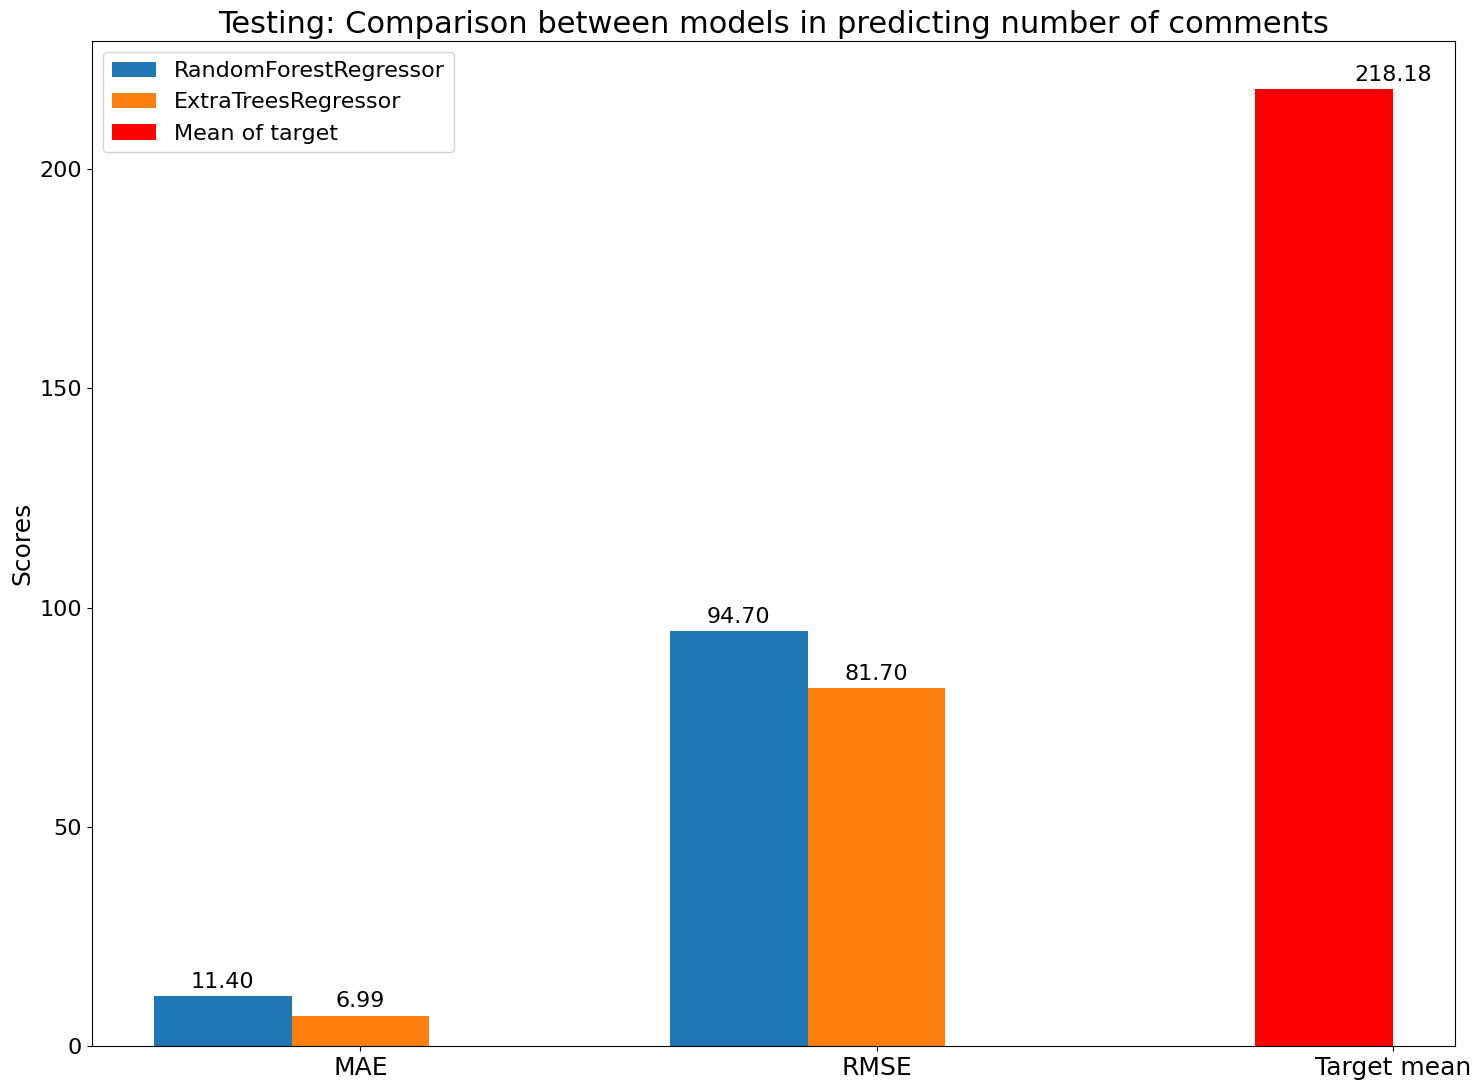

In [36]:
comparing_models_test_bar_plot([random_forest_2, extra_tree_2], X_test, y_test.iloc[:, 0],
    plot_title = "Testing: Comparison between models in predicting number of comments",
                                           save_path="images/comparison_comments_test.png")

Figure saved to images/comparison_voteups_test.png


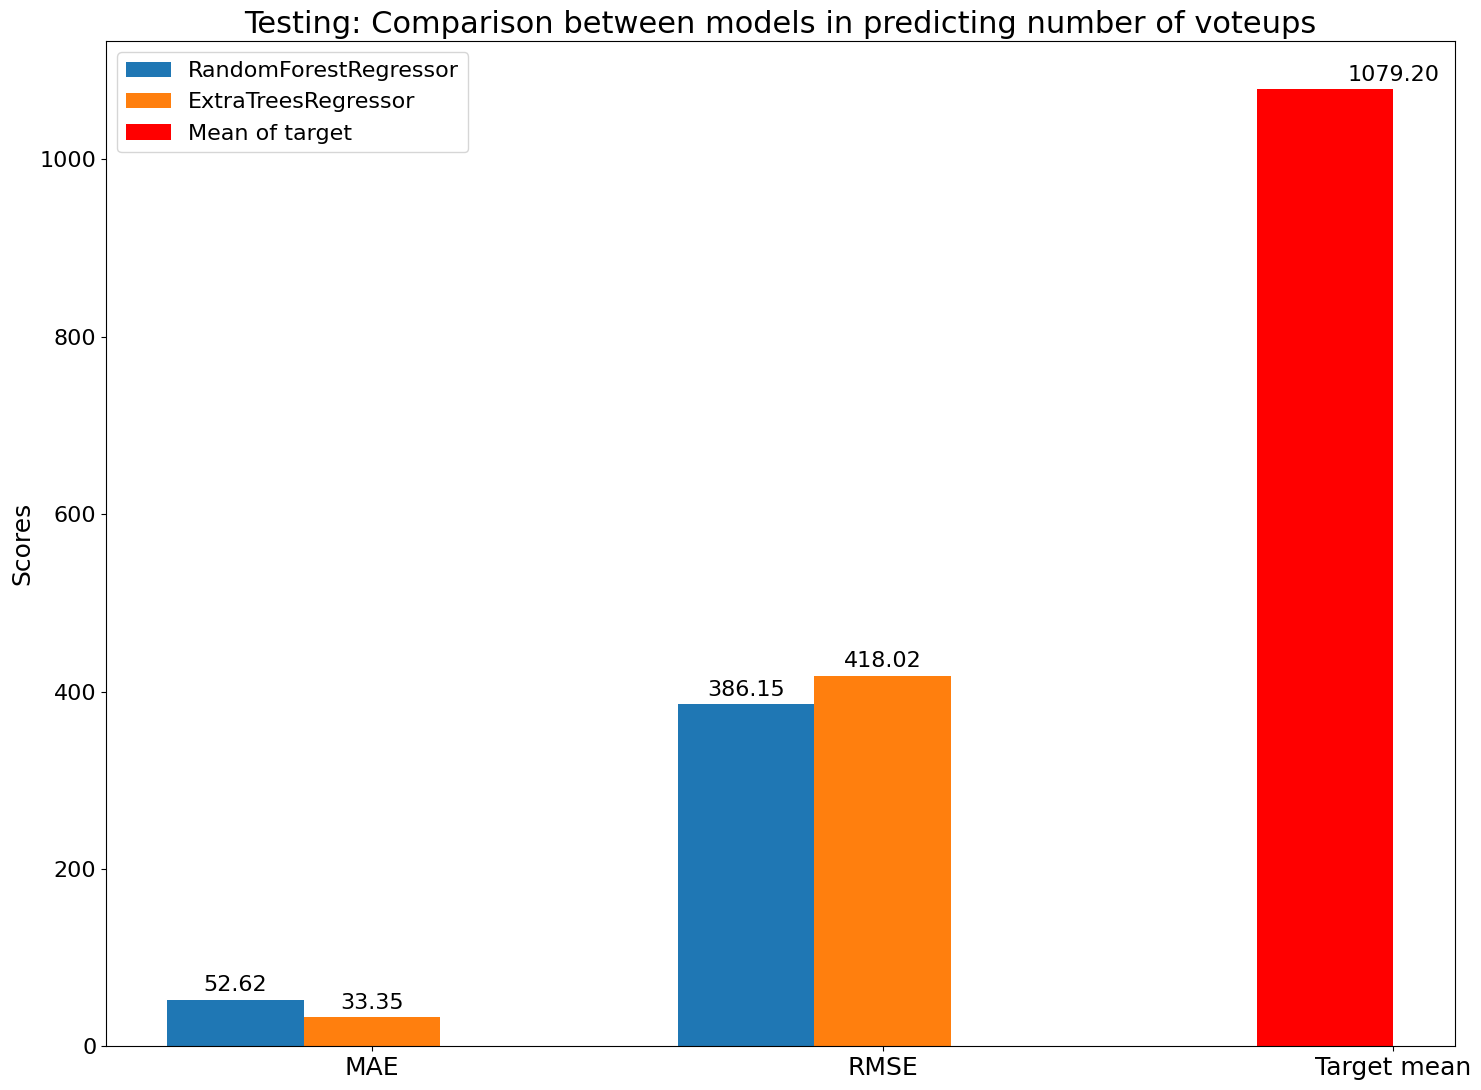

In [37]:
comparing_models_test_bar_plot([random_forest, extra_tree], X_test, y_test.iloc[:, 1],
    plot_title = "Testing: Comparison between models in predicting number of voteups",
                                           save_path="images/comparison_voteups_test.png")

# **Utility functions, for inference purpose.**

**Function to categorize the time of the day**

In [38]:
from predict import categorize_time_of_day
test_datetime = datetime.now()
categorize_time_of_day(test_datetime)

{'isNight': 0, 'isMorning': 0, 'isAfternoon': 1, 'isEvening': 0}

**Getting the length of the string. Later we will use the post title and post content given by the user on the Website to feed into this function**

In [39]:
from predict import string_length
# Test the function
input_string = "Hello, World!"
print("Length of the string:", string_length(input_string))

Length of the string: 13


**Function to receive the URL referenced link given by the user on the Website, and then return the name of the website of the URL link referenced in the Reddit post**

In [40]:
from predict import reference_external_link
# Test the function
url = "https://www.washingtonpost.com/opinions/"
website_list = ["bbc", "cnn", "theguardian"]

reference_external_link(url)

{'Other': 1,
 'apnews': 0,
 'bbc': 0,
 'businessinsider': 0,
 'clips': 0,
 'cnn': 0,
 'en': 0,
 'imgur': 0,
 'independent': 0,
 'mil': 0,
 'nbcnews': 0,
 'newsweek': 0,
 'noURL': 0,
 'rawstory': 0,
 'reuters': 0,
 'streamable': 0,
 'theguardian': 0,
 'thehill': 0,
 'twitter': 0,
 'x': 0,
 'youtube': 0}

In [41]:
reference_external_link()

{'Other': 0,
 'apnews': 0,
 'bbc': 0,
 'businessinsider': 0,
 'clips': 0,
 'cnn': 0,
 'en': 0,
 'imgur': 0,
 'independent': 0,
 'mil': 0,
 'nbcnews': 0,
 'newsweek': 0,
 'noURL': 1,
 'rawstory': 0,
 'reuters': 0,
 'streamable': 0,
 'theguardian': 0,
 'thehill': 0,
 'twitter': 0,
 'x': 0,
 'youtube': 0}

In [42]:
reference_external_link("https://www.bbc.com/vietnamese/articles/clw0ywqqg2no")

{'Other': 0,
 'apnews': 0,
 'bbc': 1,
 'businessinsider': 0,
 'clips': 0,
 'cnn': 0,
 'en': 0,
 'imgur': 0,
 'independent': 0,
 'mil': 0,
 'nbcnews': 0,
 'newsweek': 0,
 'noURL': 0,
 'rawstory': 0,
 'reuters': 0,
 'streamable': 0,
 'theguardian': 0,
 'thehill': 0,
 'twitter': 0,
 'x': 0,
 'youtube': 0}

**Counting the number of occurences for each word in a list of words in Reddit post title and post content and return a dictionary.**

In [43]:
# Test the function
from predict import count_word_occurrences
long_string = "This is ago always been better than almost almost."

print(count_word_occurrences(long_string))

{'able': 0, 'actually': 0, 'ago': 1, 'almost': 1, 'already': 0, 'also': 0, 'always': 1, 'amp': 0, 'another': 0, 'anyone': 0, 'anything': 0, 'around': 0, 'asked': 0, 'away': 0, 'back': 0, 'bad': 0, 'believe': 0, 'best': 0, 'better': 1, 'big': 0, 'bit': 0, 'ca': 0, 'call': 0, 'called': 0, 'came': 0, 'car': 0, 'care': 0, 'come': 0, 'comments': 0, 'could': 0, 'dad': 0, 'daughter': 0, 'day': 0, 'days': 0, 'de': 0, 'done': 0, 'e': 0, 'else': 0, 'end': 0, 'enough': 0, 'even': 0, 'ever': 0, 'every': 0, 'everyone': 0, 'everything': 0, 'family': 0, 'feel': 0, 'felt': 0, 'find': 0, 'first': 0, 'found': 0, 'friends': 0, 'fuck': 0, 'full': 0, 'game': 0, 'games': 0, 'get': 0, 'getting': 0, 'give': 0, 'go': 0, 'going': 0, 'good': 0, 'got': 0, 'great': 0, 'gt': 0, 'guy': 0, 'guys': 0, 'hard': 0, 'help': 0, 'home': 0, 'hours': 0, 'house': 0, 'https': 0, 'husband': 0, 'instead': 0, 'job': 0, 'keep': 0, 'kids': 0, 'kind': 0, 'know': 0, 'last': 0, 'later': 0, 'league': 0, 'least': 0, 'left': 0, 'let': 0, 

# **Saving the trained scikit learn models**

**Saving the best models into a directory**

In [44]:
from utility import save_model
save_model(random_forest, "models/RandomForest_voteups.pkl")
save_model(random_forest_2, "models/RandomForest_comments.pkl")
save_model(extra_tree, "models/ExtraTree_voteups.pkl")
save_model(extra_tree_2, "models/ExtraTree_comments.pkl")

Model saved to models/RandomForest_voteups.pkl
Model saved to models/RandomForest_comments.pkl
Model saved to models/ExtraTree_voteups.pkl
Model saved to models/ExtraTree_comments.pkl


# **Inference**

**Test the inference function written in predict.py. Infering the number of voteups and the number of comments for the ExtraTree model, whom we got the best result so far.**

In [1]:
from predict import predict_comments_api, predict_voteups_api, inference_items
from datetime import datetime

In [2]:
predict_voteups_api(subscribers=15, posting_time=datetime.today(), posting_title="face old woman women women pretty pretty girl",
                    posting_content ="the casualty ago almost ago ago")

Expected features: ['subscribers' 'isFriday' 'isMonday' 'isSaturday' 'isSunday' 'isThursday'
 'isTuesday' 'isWednesday' 'isAfternoon' 'isEvening' 'isMorning' 'isNight'
 'selftext_length' 'title_length' 'Other' 'apnews' 'bbc' 'businessinsider'
 'clips' 'cnn' 'en' 'imgur' 'independent' 'mil' 'nbcnews' 'newsweek'
 'noURL' 'rawstory' 'reuters' 'streamable' 'theguardian' 'thehill'
 'twitter' 'x' 'youtube' 'able' 'actually' 'ago' 'almost' 'already' 'also'
 'always' 'amp' 'another' 'anyone' 'anything' 'around' 'asked' 'away'
 'back' 'bad' 'believe' 'best' 'better' 'big' 'bit' 'ca' 'call' 'called'
 'came' 'car' 'care' 'come' 'comments' 'could' 'dad' 'daughter' 'day'
 'days' 'de' 'done' 'e' 'else' 'end' 'enough' 'even' 'ever' 'every'
 'everyone' 'everything' 'family' 'feel' 'felt' 'find' 'first' 'found'
 'friends' 'fuck' 'full' 'game' 'games' 'get' 'getting' 'give' 'go'
 'going' 'good' 'got' 'great' 'gt' 'guy' 'guys' 'hard' 'help' 'home'
 'hours' 'house' 'https' 'husband' 'instead' 'job' 'keep'

100.13416666666666

In [3]:
predict_comments_api(subscribers=15, posting_time=datetime.today(), posting_title="face old woman women women pretty pretty girl",
                    posting_content ="the content must be saying probably actually ago almost ago ago")

86.37733333333334